# Innvent reading data

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## utility method for transforming dataframe columns lat and long

In [2]:
PRECISION_DECIMAL = 5
def transform_latlong(dataframe, precision=PRECISION_DECIMAL):
    dataframe['lat'] = dataframe['lat'].round(decimals = precision)
    dataframe['long'] = dataframe['long'].round(decimals = precision)
    dataframe['lat'] = dataframe['lat'].astype(str)
    dataframe['long'] = dataframe['long'].astype(str)
    
    return dataframe

## read data

In [3]:
df = pd.read_csv('innvent/2/reading.txt',float_precision='round_trip', usecols=[0,1,2], names=['LA','lat','long'], header=None)

df = transform_latlong(df, PRECISION_DECIMAL)

print(df.shape)
print(df.head())

print(df.shape)
print(df.head())
print(df.describe())
df = df.groupby(['lat','long'], as_index=False)['LA'].mean()
df['LA'] = df['LA'].diff()
df['LA'].fillna(0, inplace=True)

print(df.shape)
print(df.head())
print(df.describe())

(3367, 3)
         LA       lat      long
0 -0.155832  12.98093  77.71713
1  0.022970  12.98093  77.71713
2 -0.123465  12.98093  77.71713
3 -0.279197  12.98093  77.71713
4 -0.020304  12.98093  77.71713
(3367, 3)
         LA       lat      long
0 -0.155832  12.98093  77.71713
1  0.022970  12.98093  77.71713
2 -0.123465  12.98093  77.71713
3 -0.279197  12.98093  77.71713
4 -0.020304  12.98093  77.71713
                LA
count  3367.000000
mean     -0.006540
std       0.391536
min      -5.561642
25%      -0.067112
50%      -0.002026
75%       0.048813
max       4.961407
(333, 3)
        lat      long        LA
0  12.98092  77.71712  0.000000
1  12.98093  77.71712 -0.041583
2  12.98093  77.71713  0.243773
3  12.98095  77.71712 -0.259265
4   12.9811  77.71714  0.164086
               LA
count  333.000000
mean    -0.000140
std      0.174258
min     -1.099107
25%     -0.065589
50%      0.004843
75%      0.069092
max      0.761938


## read true pothole data

In [4]:
gpsdf = pd.read_csv('innvent/2/gps.txt', float_precision='round_trip',usecols=[0,1], names=['lat','long'], header=None)
gpsdf['class']=1
gpsdf = transform_latlong(gpsdf, PRECISION_DECIMAL)

gpsdf.groupby(['lat','long'], as_index=False)
print(gpsdf.shape)
print(gpsdf.head())

resultdf = pd.merge(df, gpsdf, on=['lat','long'], how='left')
print(resultdf.shape)
print(resultdf.head())

(45, 3)
        lat      long  class
0  12.98183  77.71735      1
1    12.982  77.71745      1
2  12.98209  77.71745      1
3  12.98212  77.71745      1
4  12.98235  77.71771      1
(333, 4)
        lat      long        LA  class
0  12.98092  77.71712  0.000000    NaN
1  12.98093  77.71712 -0.041583    NaN
2  12.98093  77.71713  0.243773    NaN
3  12.98095  77.71712 -0.259265    NaN
4   12.9811  77.71714  0.164086    NaN


## Replicate pothole data to balance pothole classes

In [5]:
mydf=resultdf.loc[resultdf['class'] == 1.0]
print("mydf")
print(mydf.shape)
print(mydf)
times_to_repeat = int(len(resultdf.index)/(len(mydf.index)+1))
print(times_to_repeat)
# newdf = pd.DataFrame(np.repeat(mydf.values,times_to_repeat-1,axis=0))
mydf=pd.concat([mydf]*times_to_repeat, ignore_index=True)
print("newdf")
print(mydf.shape)
print(mydf)


mydf
(1, 4)
         lat      long       LA  class
41  12.98235  77.71771  0.08331    1.0
166
newdf
(166, 4)
          lat      long       LA  class
0    12.98235  77.71771  0.08331    1.0
1    12.98235  77.71771  0.08331    1.0
2    12.98235  77.71771  0.08331    1.0
3    12.98235  77.71771  0.08331    1.0
4    12.98235  77.71771  0.08331    1.0
5    12.98235  77.71771  0.08331    1.0
6    12.98235  77.71771  0.08331    1.0
7    12.98235  77.71771  0.08331    1.0
8    12.98235  77.71771  0.08331    1.0
9    12.98235  77.71771  0.08331    1.0
10   12.98235  77.71771  0.08331    1.0
11   12.98235  77.71771  0.08331    1.0
12   12.98235  77.71771  0.08331    1.0
13   12.98235  77.71771  0.08331    1.0
14   12.98235  77.71771  0.08331    1.0
15   12.98235  77.71771  0.08331    1.0
16   12.98235  77.71771  0.08331    1.0
17   12.98235  77.71771  0.08331    1.0
18   12.98235  77.71771  0.08331    1.0
19   12.98235  77.71771  0.08331    1.0
20   12.98235  77.71771  0.08331    1.0
21   12.982

## visualise the merged dataframe

In [6]:
resultdf=resultdf.append(mydf,ignore_index=True)
resultdf['class'].fillna(0, inplace=True)

print(resultdf.shape)
print(resultdf.head())
print(resultdf.describe())

(499, 4)
        lat      long        LA  class
0  12.98092  77.71712  0.000000    0.0
1  12.98093  77.71712 -0.041583    0.0
2  12.98093  77.71713  0.243773    0.0
3  12.98095  77.71712 -0.259265    0.0
4   12.9811  77.71714  0.164086    0.0
               LA       class
count  499.000000  499.000000
mean     0.027621    0.334669
std      0.147624    0.472348
min     -1.099107    0.000000
25%     -0.014790    0.000000
50%      0.069092    0.000000
75%      0.083310    1.000000
max      0.761938    1.000000


## split data into test and train

In [7]:
column_names = ['class']
train_dataset = resultdf.sample(frac=0.8,random_state=0)
test_dataset = resultdf.drop(train_dataset.index)
train_labels = train_dataset[column_names]
test_labels = test_dataset[column_names]

train_dataset = train_dataset.drop(column_names, axis=1)
test_dataset = test_dataset.drop(column_names, axis=1)
print(train_dataset.head())


          lat      long        LA
90   12.98409  77.71853 -0.539767
254  12.98846  77.71846 -0.009068
283   12.9888  77.71834  0.016987
444  12.98235  77.71771  0.083310
474  12.98235  77.71771  0.083310


## train my model

In [8]:
x_values = train_dataset[['LA']]
y_values = train_labels[['class']]

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(x_values, y_values)

C:\Users\i341494\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## calculate mean squared errors

In [9]:
y_pred =  clf.predict(x_values)
print(clf.score(test_dataset[['LA']], test_labels[['class']]))
cm = confusion_matrix(y_values, y_pred)
print(cm)

0.58
[[251  18]
 [130   0]]


## visualize results

               LA
count  100.000000
mean     0.045161
std      0.156871
min     -0.435947
25%     -0.009707
50%      0.083310
75%      0.083310
max      0.761938


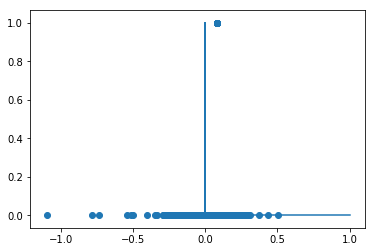

In [10]:
plt.scatter(x_values, y_values)
print(test_dataset.describe())
plt.plot(test_labels[['class']], clf.predict(test_dataset[['LA']]))
plt.show()

## test our model on unseen data

In [11]:
#first read the unseen data
unseendf = pd.read_csv('innvent/reading.txt',float_precision='round_trip', usecols=[0,1,2], names=['LA','lat','long'], header=None)
unseendf = transform_latlong(unseendf, PRECISION_DECIMAL)

print(unseendf.shape)
print(unseendf.head())

print(unseendf.shape)
print(unseendf.head())
print(unseendf.describe())
unseendf = unseendf.groupby(['lat','long'], as_index=False)['LA'].mean()
unseendf['LA'] = unseendf['LA'].diff()
unseendf['LA'].fillna(0, inplace=True)

print(unseendf.shape)
print(unseendf.head())
print(unseendf.describe())

(4719, 3)
         LA       lat      long
0  0.000000  12.97999  77.71607
1  0.136079  12.97999  77.71607
2 -0.106952  12.97999  77.71607
3 -0.376104  12.97999  77.71607
4  0.437133  12.97999  77.71607
(4719, 3)
         LA       lat      long
0  0.000000  12.97999  77.71607
1  0.136079  12.97999  77.71607
2 -0.106952  12.97999  77.71607
3 -0.376104  12.97999  77.71607
4  0.437133  12.97999  77.71607
                LA
count  4719.000000
mean      0.023636
std       0.504304
min      -4.084384
25%      -0.135573
50%       0.005749
75%       0.176612
max       4.292345
(564, 3)
        lat      long        LA
0  12.97993  77.71602  0.000000
1  12.97999  77.71607 -0.076532
2  12.98004  77.71627  0.133717
3  12.98004  77.71628 -0.117980
4  12.98102  77.71717 -0.363320
               LA
count  564.000000
mean    -0.000069
std      0.226567
min     -1.125301
25%     -0.121522
50%     -0.000782
75%      0.112370
max      1.029215


## predict ML values

In [12]:
unseen_predict =  clf.predict(unseendf[['LA']])
# unseendf['class'] =unseen_predict
print(unseendf.shape)
print(unseendf.head())
print(unseendf.describe())
# print(unseendf.groupby('class').size())

(564, 3)
        lat      long        LA
0  12.97993  77.71602  0.000000
1  12.97999  77.71607 -0.076532
2  12.98004  77.71627  0.133717
3  12.98004  77.71628 -0.117980
4  12.98102  77.71717 -0.363320
               LA
count  564.000000
mean    -0.000069
std      0.226567
min     -1.125301
25%     -0.121522
50%     -0.000782
75%      0.112370
max      1.029215


## measure our model against true value

In [13]:
potholedf = pd.read_csv('innvent/gps.txt', float_precision='round_trip',usecols=[0,1], names=['lat','long'], header=None)
potholedf['class']=1
potholedf = transform_latlong(potholedf, PRECISION_DECIMAL)

potholedf.groupby(['lat','long'], as_index=False)
print(potholedf.shape)
print(potholedf.head())

mynewdf = pd.merge(unseendf, potholedf, on=['lat','long'], how='left')

mynewdf['class'].fillna(0, inplace=True)
print(mynewdf.shape)
print(mynewdf.head())
print(mynewdf.describe())
# mydf=resultdf.loc[resultdf['class'] == 1.0]

testdf = pd.merge(unseendf, potholedf, how='inner', left_on=['lat','long'], right_on=['lat','long'])
print(testdf.shape)
print(testdf.head())
print(testdf.describe())


(37, 3)
        lat      long  class
0  12.97993  77.71602      1
1  12.98004  77.71628      1
2  12.98004  77.71628      1
3  12.98004  77.71628      1
4   12.9821  77.71743      1
(566, 4)
        lat      long        LA  class
0  12.97993  77.71602  0.000000    1.0
1  12.97999  77.71607 -0.076532    0.0
2  12.98004  77.71627  0.133717    0.0
3  12.98004  77.71628 -0.117980    1.0
4  12.98004  77.71628 -0.117980    1.0
               LA       class
count  566.000000  566.000000
mean    -0.000485    0.056537
std      0.226274    0.231160
min     -1.125301    0.000000
25%     -0.121079    0.000000
50%     -0.000899    0.000000
75%      0.111878    0.000000
max      1.029215    1.000000
(32, 4)
        lat      long        LA  class
0  12.97993  77.71602  0.000000      1
1  12.98004  77.71628 -0.117980      1
2  12.98004  77.71628 -0.117980      1
3  12.98004  77.71628 -0.117980      1
4  12.98267  77.71789 -0.444705      1
              LA  class
count  32.000000   32.0
mean   -0.08772

## predict clf score

In [14]:
x_values = mynewdf[['LA']]
y_values = mynewdf[['class']]

y_pred =  clf.predict(x_values)
print(clf.score(x_values, y_values))
cm = confusion_matrix(y_values, y_pred)
print(cm)

0.8197879858657244
[[460  74]
 [ 28   4]]


   ## export model coefficients

In [15]:
A = clf.coef_
B =clf.intercept_
print(A)
print(B)

[[2.18447212]]
[-0.44742997]


## Using SVM

In [16]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf_svm = SVC(kernel='rbf') 

# fitting x samples and y classes 
clf_svm.fit(train_dataset[['LA']], train_labels[['class']]) 


C:\Users\i341494\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\i341494\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## testing SVM model values

In [17]:
y_pred =  clf_svm.predict(x_values)
print(clf_svm.score(x_values, y_values))
cm = confusion_matrix(y_values, y_pred)
print(cm)

0.9434628975265018
[[534   0]
 [ 32   0]]


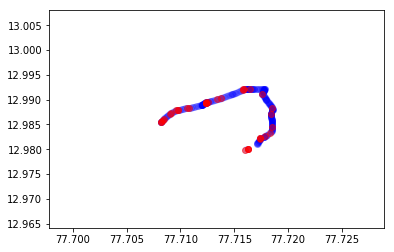

In [34]:
# resultdf.info()

import matplotlib.pyplot as plt
unseendf['long'] = unseendf['long'].astype(float)
unseendf['lat'] = unseendf['lat'].astype(float)
plt.scatter(x=unseendf['long'],y=unseendf['lat'], alpha=0.1,c='b')


potholedf['long'] = potholedf['long'].astype(float)
potholedf['lat'] = potholedf['lat'].astype(float)
plt.scatter(x=potholedf['long'],y=potholedf['lat'], alpha=0.5,c='r')
plt.show()